In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('/content/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check for missing values


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Filling missing values for AGE with MEDIAN and drop Cabin due to many missing values


In [4]:
df['Age'].fillna(df['Age'].median(),inplace=True)

df.drop(columns=['Cabin'],inplace=True)

## Replacing missing values for Embarked by MODE.


In [5]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [17]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## Visualisation

In [19]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

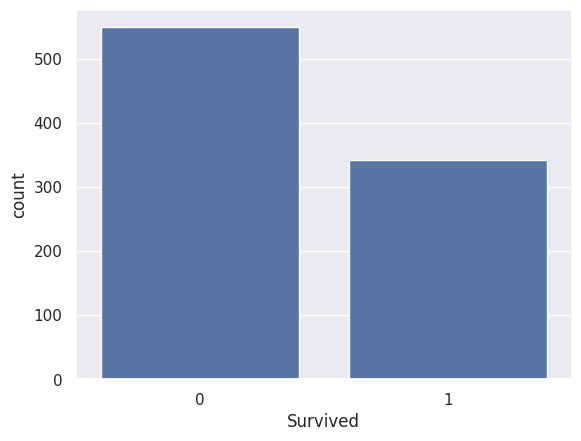

In [20]:
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Sex', ylabel='count'>

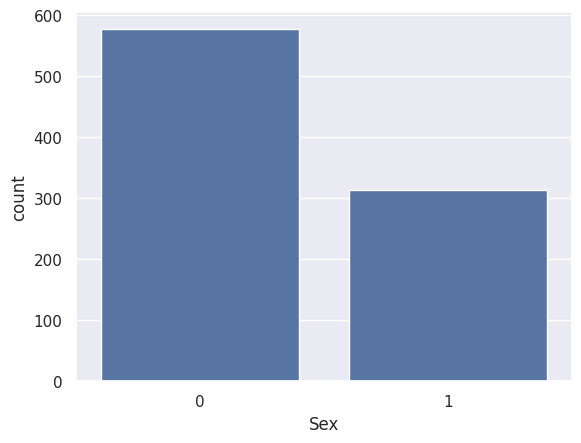

In [21]:
sns.countplot(x='Sex',data=df)

<Axes: xlabel='Sex', ylabel='count'>

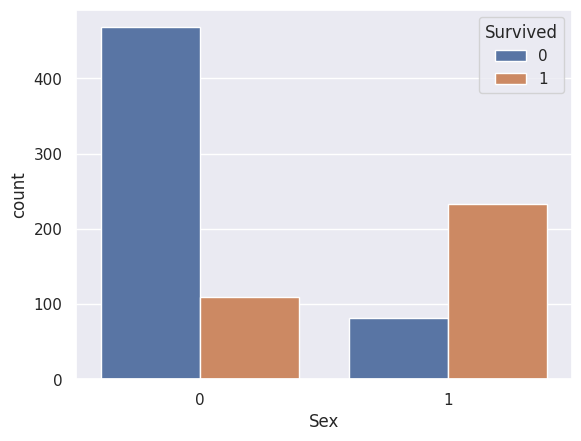

In [22]:
sns.countplot(x='Sex',hue='Survived',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

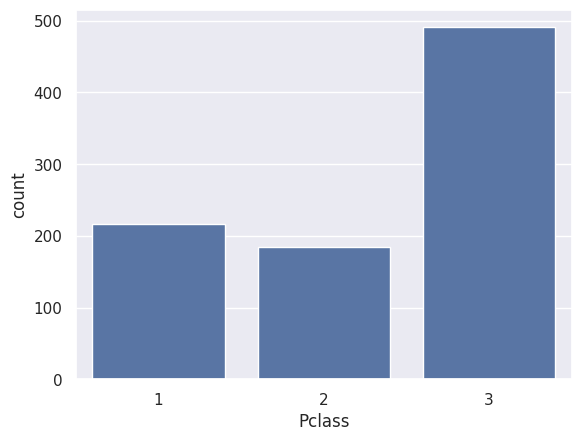

In [25]:
sns.countplot(x='Pclass',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

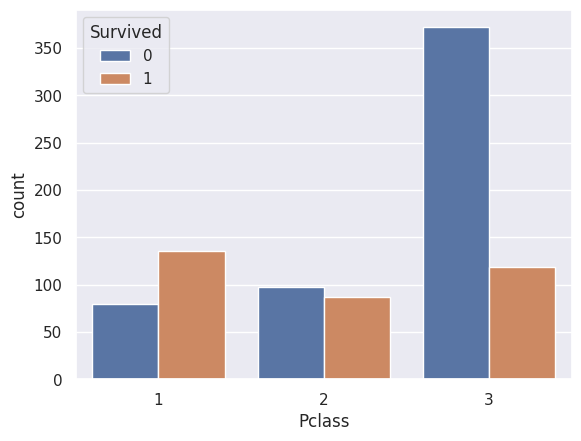

In [26]:
sns.countplot(x='Pclass',hue='Survived',data=df)

## Converting Categorical data into Numerical data

In [6]:
df['Sex']=df['Sex'].map({'male':0,'female':1})
df=pd.get_dummies(df,columns=['Embarked'])

## Dropping unwanted columns from the dataset

In [7]:
df.drop(columns=['Name','Ticket'],inplace=True)

## Splitting data into TRAIN & TESTING sets.

In [27]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['Survived'])
Y = df['Survived']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=2)

## Standardize feature values.

In [28]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

## Trainnig model (LOGISTIC REGRESSION  MODEL)

In [29]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

## Making Predictions

In [41]:
Y_pred = model.predict(X_test)

## Evaluate the model

In [38]:
from sklearn.metrics import accuracy_score,classification_report
print(f'Accuracy:{accuracy_score(Y_train,Y_pred)}')
print(classification_report(Y_train,Y_pred))

Accuracy:0.8089887640449438
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       449
           1       0.76      0.71      0.73       263

    accuracy                           0.81       712
   macro avg       0.80      0.79      0.79       712
weighted avg       0.81      0.81      0.81       712



In [42]:
pred=print('Predicted:',Y_pred)

Predicted: [0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]
